# Bathymetric data

[*GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9*)](https://www.gebco.net/data_and_products/gridded_bathymetry_data/)


In [1]:
import numpy as np
import pandas as pd
import xarray

In [2]:
ds = xarray.open_dataset("../tests/testdata/gebco_2020_n56.3_s55.2_w12.2_e13.1.nc")
ds

<xarray.Dataset>
Dimensions:    (lat: 264, lon: 216)
Coordinates:
  * lat        (lat) float64 55.2 55.21 55.21 55.21 ... 56.29 56.29 56.29 56.3
  * lon        (lon) float64 12.2 12.21 12.21 12.21 ... 13.09 13.09 13.09 13.1
Data variables:
    elevation  (lat, lon) int16 ...
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2020 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The GEBCO_2020 Grid is the latest global bathymetric produc...
    history:      Information on the development of the data set and the sour...
    references:   DOI: 10.5285/a29c5465-b138-234d-e053-6c86abc040b9
    comment:      The data in the GEBCO_2020 Grid should not be used for navi...
    node_offset:  1.0

In [3]:
from collections.abc import *

In [7]:
type(ds)

xarray.core.dataset.Dataset

In [22]:
isinstance(ds, Iterb)

False

In [4]:
isinstance(ds, MutableMapping)

False

In [16]:
df = ds.interp(lat=55.5).to_dataframe()

c:\users\jan\appdata\local\programs\python\python39\lib\site-packages\xarray\core\missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\users\jan\appdata\local\programs\python\python39\lib\site-packages\xarray\core\missing.py:560: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")


In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
isinstance(df, Mapping)

False

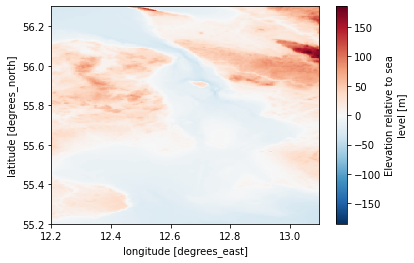

In [3]:
ds.elevation.plot()

In [4]:
ds.elevation.sel(lon=12.74792, lat=55.865, method="nearest")

C:\Users\JAN\AppData\Local\Programs\Python\Python39\lib\site-packages\xarray\core\indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
C:\Users\JAN\AppData\Local\Programs\Python\Python39\lib\site-packages\xarray\core\indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


<xarray.DataArray 'elevation' ()>
array(-43, dtype=int16)
Coordinates:
    lat      float64 55.86
    lon      float64 12.75
Attributes:
    standard_name:       height_above_reference_ellipsoid
    long_name:           Elevation relative to sea level
    units:               m
    sdn_parameter_urn:   SDN:P01::BATHHGHT
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

Check ordering of dimensions, should be (y,x)

In [13]:
ds.elevation.dims

('lat', 'lon')

In [6]:
el = ds.elevation.values
el.shape

(264, 216)

Check that axes are increasing, S->N W->E

In [11]:
ds.lat.values[0],ds.lat.values[-1] 

55.20208333333332

In [14]:
ds.lon.values[0],ds.lon.values[-1] 

(12.20208333333332, 13.097916666666663)

In [17]:
el[0,0] # Bottom left

-8

In [18]:
el[-1,0] # Top Left

-31

In [20]:
from mikeio.spatial import Grid2D
from mikeio.eum import EUMType

from mikeio import DataArray
from mikeio.eum import ItemInfo

geometry = Grid2D(x=ds.lon.values, y=ds.lat.values, projection="LONG/LAT")
geometry

<mikeio.Grid2D>
x-axis: nx=216 points from x0=12.2021 to x1=13.0979 with dx=0.00416667
y-axis: ny=264 points from y0=55.2021 to y1=56.2979 with dy=0.00416667
Number of grid points: 57024

In [21]:
da = DataArray(data=el,
               time="2020",
               item=ItemInfo("Elevation", EUMType.Total_Water_Depth),
               geometry=geometry,
               dims=("y","x") # No time dimension
               )
da

<mikeio.DataArray>
Name: Elevation
Dimensions: (y:264, x:216)
Time: 2020-01-01 00:00:00 (time-invariant)

<AxesSubplot:xlabel='Longitude [degrees]', ylabel='Latitude [degrees]'>

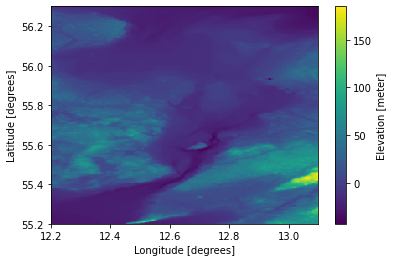

In [22]:
da.plot()

<AxesSubplot:xlabel='Longitude [degrees]', ylabel='Latitude [degrees]'>

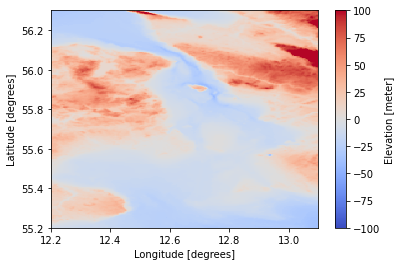

In [8]:
da.plot(cmap='coolwarm', vmin=-100,vmax=100)

In [9]:
da.to_dfs("gebco.dfs2")

<AxesSubplot:xlabel='Longitude [degrees]', ylabel='Latitude [degrees]'>

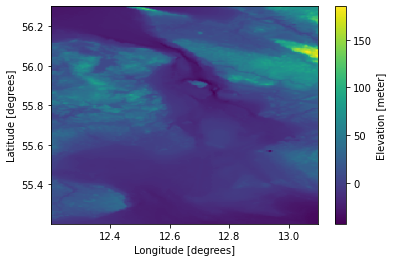

In [10]:
import mikeio
ds = mikeio.read("gebco.dfs2")
ds.Elevation.plot()

# Clean up

In [ ]:
import os
os.remove("gebco.dfs2")